# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6,4))

In [70]:
df = sns.load_dataset('tips')

In [71]:
r_quadraticos = {}

df['net_bill'] = df['total_bill'] - df['tip']
df['tip_pct'] = round((df['tip'] / df['net_bill']) * 100, 2)
df

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,17.21
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,25.62
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,7.94
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,9.68
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,10.89


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.15
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           1.62e-13
Time:                        21:20:42   Log-Likelihood:                -999.85
No. Observations:                 244   AIC:                             2004.
Df Residuals:                     242   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           61.8086      5.401  

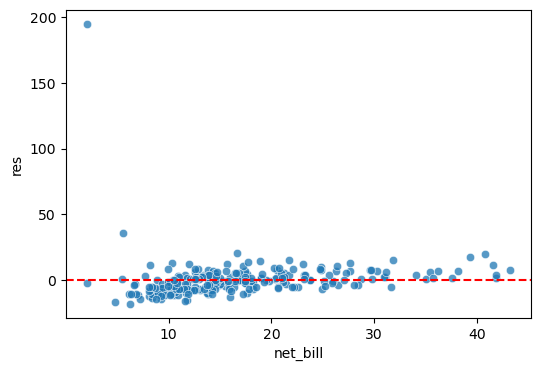

In [72]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data=df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [73]:
df['pred_y'] = reg.fittedvalues
modelo_1 = df[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
r_quadraticos['Modelo 1'] = round(modelo_1, 2)

modelo_1

0.20172846610671777

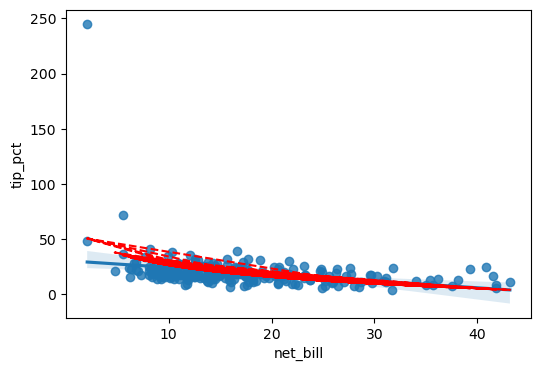

In [74]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = df)
plt.plot(df['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           0.000296
Time:                        21:20:43   Log-Likelihood:                -1020.7
No. Observations:                 244   AIC:                             2045.
Df Residuals:                     242   BIC:                             2052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                23.88

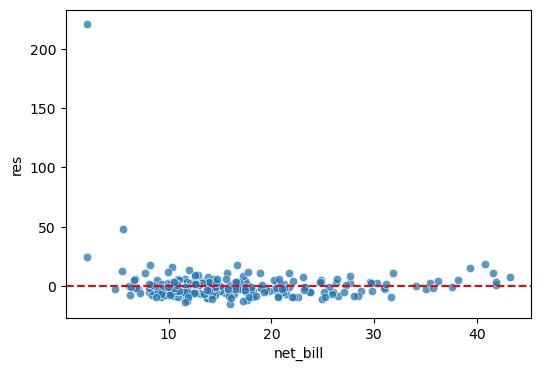

In [75]:
reg = smf.ols('tip_pct ~ np.power(net_bill,2)', data=df).fit()
print(reg.summary())

df['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [76]:
df['pred_y'] = reg.fittedvalues
modelo_2 = df[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
r_quadraticos['Modelo 2'] = round(modelo_2, 2)

modelo_2

0.05276972261894293

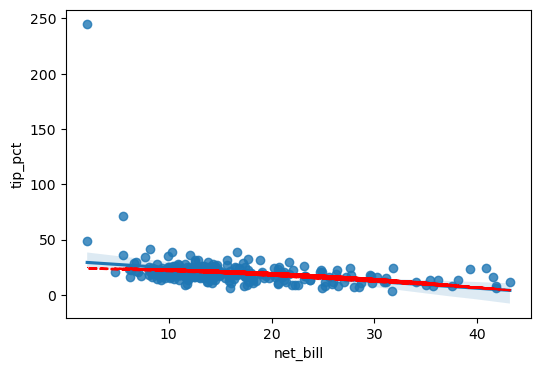

In [77]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = df)
plt.plot(df['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           8.26e-16
Time:                        21:20:43   Log-Likelihood:                -105.99
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3303      0.056     59.751      0.0

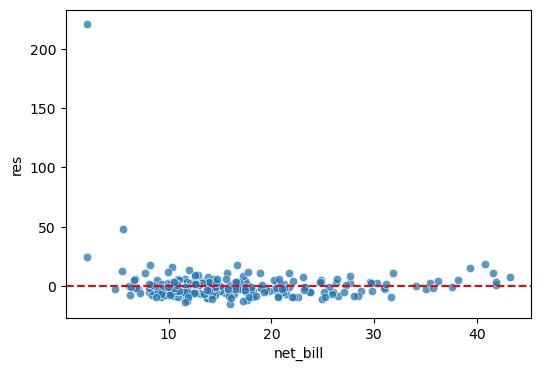

In [78]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = df).fit()
print(reg.summary())

sns.scatterplot(x='net_bill', y='res', data=df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [79]:
df['pred_y'] = np.exp(reg.fittedvalues)
modelo_3 = df[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
r_quadraticos['Modelo 3'] = round(modelo_3, 2)
modelo_3

0.11440839077699712

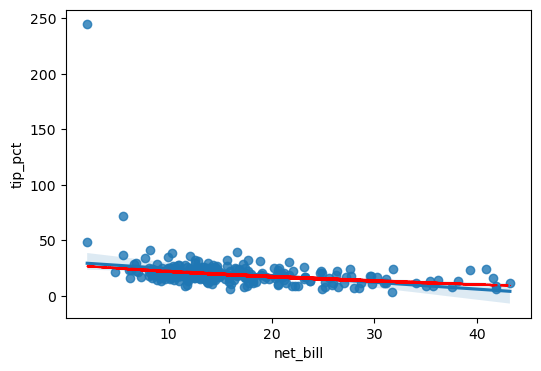

In [80]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = df)
plt.plot(df['net_bill'], df['pred_y'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           5.19e-20
Time:                        21:20:44   Log-Likelihood:                -96.343
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2109      0.133  

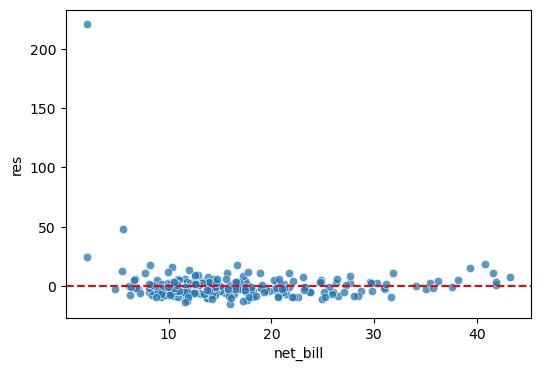

In [81]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = df).fit()
print(reg.summary())

sns.scatterplot(x='net_bill', y='res', data=df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [82]:
df['pred_y'] = np.exp(reg.fittedvalues)
modelo_4 = df[['pred_y', 'tip_pct']].corr().iloc[0,1]**2
r_quadraticos['Modelo 4'] = round(modelo_4, 2)

modelo_4

0.30894418065629126

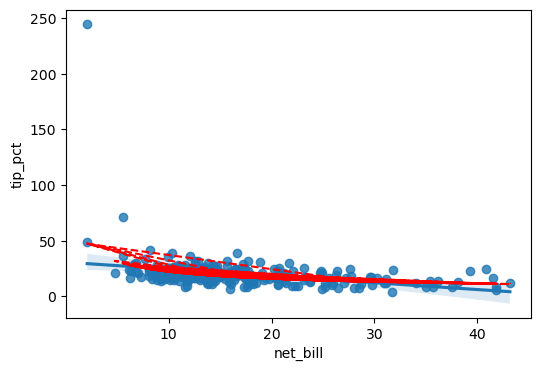

In [83]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = df)
plt.plot(df['net_bill'], df['pred_y'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

In [88]:
print(f'O maior valor de R-Quadrado é: {max(r_quadraticos.values())}, que pertence ao {max(r_quadraticos, key=r_quadraticos.get)}')

O maior valor de R-Quadrado é: 0.31, que pertence ao Modelo 4
